In [1]:
import pandas as pd

In [2]:
names1880 = pd.read_csv('names/yob1880.txt', names = ['name', 'sex', 'births'])

In [4]:
names1880.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 3 columns):
name      2000 non-null object
sex       2000 non-null object
births    2000 non-null int64
dtypes: int64(1), object(2)
memory usage: 62.5+ KB


Total Number of births in Year 1880

In [5]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [8]:
years = range(1880, 2011)
pieces =[]
columns =['name', 'sex', 'birth']
for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [9]:
names = pd.concat(pieces, ignore_index=True)

In [10]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691633 entries, 0 to 1691632
Data columns (total 4 columns):
name     object
sex      object
birth    int64
year     int64
dtypes: int64(2), object(2)
memory usage: 64.5+ MB


In [12]:
names[:10]

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [14]:
total_births = names.pivot_table(values='birth', index='year', columns='sex', aggfunc=sum )

In [15]:
total_births[:5]

sex,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


In [17]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

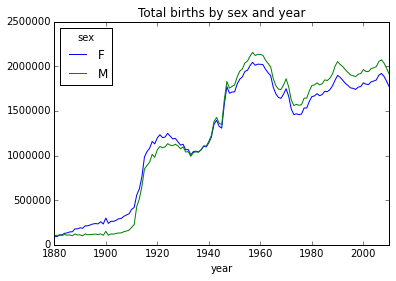

In [18]:
total_births.plot(title='Total births by sex and year')

In [21]:
def add_prop(group):
    # Integer division floors
    births = group.birth.astype(float)

    group['prop'] = births / births.sum()
    return group

In [22]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [23]:
names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691633 entries, 0 to 1691632
Data columns (total 5 columns):
name     object
sex      object
birth    int64
year     int64
prop     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 77.4+ MB


In [25]:
import numpy as np

In [26]:
np.allclose(names.groupby(['sex', 'year']).prop.sum(), 1)

True

In [34]:
def getTop(group):
    return group.sort_index(by='birth', ascending=False )[:1000];

In [35]:
grouped = names.groupby(['year', 'sex'])

In [49]:
top1000 = grouped.apply(getTop)

In [50]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [51]:
top1000[:10]

name sex  birth  year      prop
year sex                                        
1880 F   0       Mary   F   7065  1880  0.077643
         1       Anna   F   2604  1880  0.028618
         2       Emma   F   2003  1880  0.022013
         3  Elizabeth   F   1939  1880  0.021309
         4     Minnie   F   1746  1880  0.019188
         5   Margaret   F   1578  1880  0.017342
         6        Ida   F   1472  1880  0.016177
         7      Alice   F   1414  1880  0.015540
         8     Bertha   F   1320  1880  0.014507
         9      Sarah   F   1288  1880  0.014155

In [52]:
total_births = top1000.pivot_table(values='birth', index='year', columns='name', aggfunc=sum)

In [55]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN
1885,NaN,NaN,NaN,88,NaN,6,NaN,NaN,NaN,88,...,6,27,NaN,NaN,12,6,14,48,38,NaN
1886,NaN,NaN,NaN,86,NaN,NaN,NaN,NaN,NaN,84,...,13,25,NaN,NaN,8,NaN,20,52,43,NaN
1887,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,NaN,104,...,9,34,NaN,NaN,23,NaN,28,46,33,NaN
1888,NaN,NaN,NaN,90,NaN,NaN,NaN,NaN,NaN,137,...,11,42,NaN,NaN,23,7,30,42,45,NaN


In [56]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

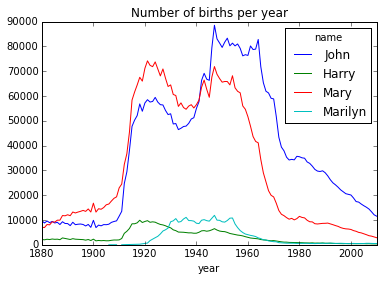

In [58]:
subset.plot(title="Number of births per year")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c54e150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11cf101d0>], dtype=object)

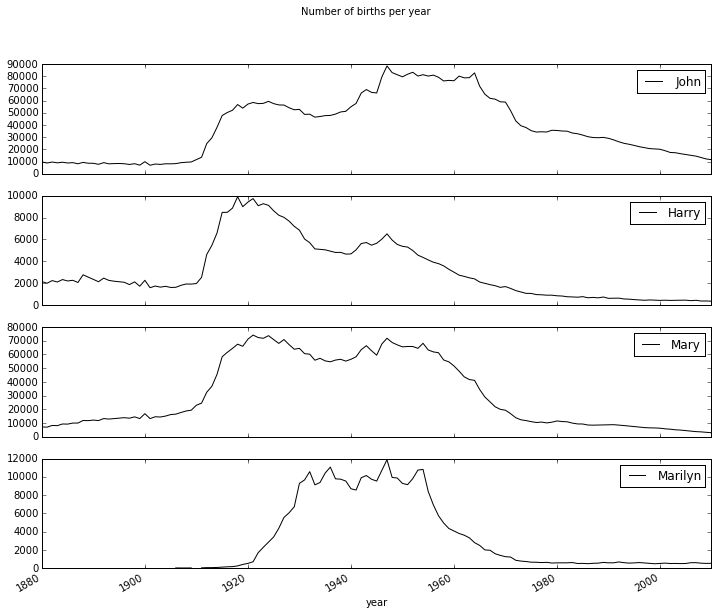

In [59]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [60]:
table = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)

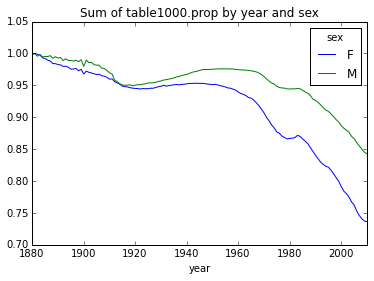

In [62]:
table.plot(title='Sum of table1000.prop by year and sex')

In [68]:
import numpy
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)+1

In [69]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [70]:
diversity

year  sex
1880  F       [38]
      M       [14]
1881  F       [38]
      M       [14]
1882  F       [38]
      M       [15]
1883  F       [39]
      M       [15]
1884  F       [39]
      M       [16]
1885  F       [40]
      M       [16]
1886  F       [41]
      M       [16]
1887  F       [41]
      M       [17]
1888  F       [42]
      M       [17]
1889  F       [43]
      M       [18]
1890  F       [44]
      M       [19]
1891  F       [44]
      M       [20]
1892  F       [44]
      M       [20]
1893  F       [44]
      M       [21]
1894  F       [45]
      M       [22]
             ...  
1996  F      [122]
      M       [64]
1997  F      [129]
      M       [67]
1998  F      [138]
      M       [70]
1999  F      [146]
      M       [73]
2000  F      [155]
      M       [77]
2001  F      [165]
      M       [81]
2002  F      [170]
      M       [83]
2003  F      [178]
      M       [87]
2004  F      [191]
      M       [92]
2005  F      [199]
      M       [96]
2006  F      [209]
  

In [71]:
diversity = diversity.unstack('sex')

In [72]:
diversity[:10]

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]
1885,[40],[16]
1886,[41],[16]
1887,[41],[17]
1888,[42],[17]


In [76]:
diversity['F'] =diversity['F'].astype(int)
diversity['M'] =diversity['M'].astype(int)

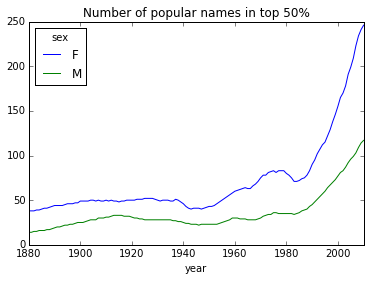

In [77]:
diversity.plot(title="Number of popular names in top 50%")

In [79]:
get_last_letter = lambda x: x[-1]

In [80]:
last_letters = names.name.map(get_last_letter)

In [81]:
last_letters.name = 'last_letter'

In [88]:
names['last_letter'] =last_letters

In [90]:
table = names.pivot_table(values='birth', index='last_letter', columns=['sex', 'year'], aggfunc=sum)

# Boy names that becomes girl name and vice versa

In [91]:
all_names = top1000.name.unique()

In [93]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [94]:
lesley_like = all_names[mask]

In [95]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [97]:
filtered.groupby('name').birth.sum()

name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    370521
Lesly      10070
Name: birth, dtype: int64

In [98]:
table = filtered.pivot_table('birth', index='year', columns='sex', aggfunc=sum)

In [99]:
table

sex,F,M
year,,
1880,8,79
1881,11,92
1882,9,128
1883,7,125
1884,15,125
1885,10,122
1886,8,136
1887,12,166
1888,23,175


In [100]:
table = table.div(table.sum(1), axis=0)

In [101]:
table.tail()

sex,F,M
year,,
2006,1,NaN
2007,1,NaN
2008,1,NaN
2009,1,NaN
2010,1,NaN


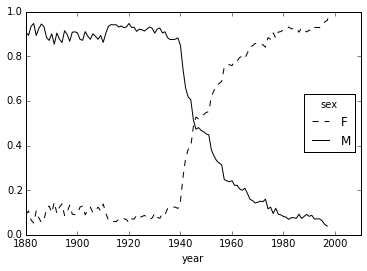

In [104]:
table.plot(style= {'M':'k-','F':'k--' })